# Nonsolobaschet Stats | 2018

In [1]:
import fanta
import config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scores txt files

### Gianluca | La mamma di Enrico

In [2]:
%%writefile gianluca.txt
gg pf ps gs c mdif
1 68.5 82.5 2 2 1
2 70 76 0 1 0.5
3 79.5 82 0 2 0
4 73.5 72 0 2 1
5 65.5 68.5 1 2 1
6 72 64 0 1 2
7 69 77.5 0 0 0.5
8 66.5 66.5 0 4 1
9 77.5 67.5 0 2 1
10 76.5 66 1 0 2
11 66 80 3 1 1
12 71 70.5 0 2 1
13 89.5 74.5 0 3 1

Overwriting gianluca.txt


### Fabio | Porti Chiusi Italiani

In [3]:
%%writefile fabio.txt
gg pf ps gs c mdif
1 82.5 68.5 1 3 3
2 86 81.5 0 2 1
3 76.5 76.5 0 1 1
4 70.5 69.5 3 3 0
5 78 69.5 0 2 0
6 64 72 1 4 0
7 70.5 70 1 2 0
8 68.5 69.5 1 2 0
9 68.5 71.5 2 2 0
10 63.5 76.5 1 0 0
11 80 66 2 0 1
12 75 67.5 0 0 0
13 76.5 66 0 1 2

Overwriting fabio.txt


### Enrico | Gianlucanonpressare

In [4]:
%%writefile enrico.txt
gg pf ps gs c mdif
1 73 64 0 1 0
2 71 82.5 1 2 0
3 78.5 80 1 1 2
4 69.5 70.5 1 2 0
5 68.5 65.5 3 4 1
6 64.5 69 1 3 0
7 69 62.5 1 1 0
8 73 80.5 1 0 0
9 71.5 68.5 2 5 0
10 66 76.5 2 0 0
11 80.5 73.5 2 3 0
12 75 76 0 3 0
13 70.5 90.5 4 3 0

Overwriting enrico.txt


### Gabriele | Sciagura

In [5]:
%%writefile gabriele.txt
gg pf ps gs c mdif
1 64.5 76.5 2 2 0
2 82.5 71 0 1 0
3 76.5 76.5 4 1 0
4 72 73.5 2 3 0
5 67.5 72 3 2 0
6 75.5 71 3 0 0.5
7 62.5 69 1 1 0.5
8 69.5 68.5 3 3 1
9 67.5 77.5 3 3 1
10 85 67 2 2 0
11 69.5 90 2 3 0
12 76 75 1 1 0
13 66 76.5 3 2 0

Overwriting gabriele.txt


### Luca | Nottingham Forrest Gump

In [6]:
%%writefile luca.txt
gg pf ps gs c mdif
1 76.5 64.5 0 1 1
2 76 70 2 0 1
3 80 78.5 2 3 2
4 78.5 79.5 2 1 1
5 69.5 78 1 1 1
6 72 75.5 1 4 1
7 77.5 69 2 1 1
8 80.5 73 0 1 1
9 70 74 0 4 1
10 76.5 63.5 0 1 1
11 90 69.5 1 2 0
12 70.5 71 0 0 0.5
13 90.5 70.5 0 1 1

Overwriting luca.txt


### Riccardo | Lagggente

In [7]:
%%writefile riccardo.txt
gg pf ps gs c mdif
1 64 73 0 4 0.5
2 81.5 86 1 1 2
3 82 79.5 0 3 1
4 79.5 78.5 1 1 1
5 72 67.5 2 3 1
6 69 64.5 2 1 0.5
7 70 70.5 1 1 1
8 66.5 66.5 0 3 1
9 74 70 1 1 2
10 67 85 3 2 0.5
11 73.5 80.5 2 1 1
12 67.5 75 3 3 0.5
13 74.5 89.5 0 1 1

Overwriting riccardo.txt


# Fill dataframe

In [8]:
df_final = fanta.configure_db()

### Global variables and stats #############################
games = max(df_final.index)   # Total number of matchdays, including uncompleted ones
games_completed = len(df_final.index.unique())   # Total number of matchdays completed
fp_mean = np.mean(df_final['fantapoints made'])
fp_med = np.median(df_final['fantapoints made'])
fp_std = np.std(df_final['fantapoints made'])
gm_mean = np.mean(df_final['GM'])
gm_med = np.median(df_final['GM'])
gm_std = np.std(df_final['GM'])

df_total = fanta.total_df(df_final)

In [9]:
### Data of the last matchday
print('\n### Data matchday number', games, ' ###')
df_last_day = df_final[df_final.index==games]
df_last_day.set_index('team', inplace=True)
display(df_last_day)

### Cumulative data
print('\n\n### Cumulative data after matchday', games, '(', games_completed,' completed )  ###')
param=['pos', 'points', 'distance', 'fantapoints made', 'rank', 'fantapoints against',
       'results', 'GM', 'GA', 'goals against gk',
      'cards', 'defense modifier', 'f_close_games', 'f_day_average', 'Luck Index'
      ] # Parameters to display
display(df_total[param].sort_values(by=['points', 'fantapoints made'], ascending=False))


### Data matchday number 13  ###


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,
enrico,70.5,90.5,4,3,0.0,1,5,L,0,0.0,-0.2,-0.2
fabio,76.5,66.0,0,1,2.0,3,1,W,3,0.0,1.2,1.2
gabriele,66.0,76.5,3,2,0.0,1,3,L,0,0.0,-0.2,-0.2
gianluca,89.5,74.5,0,3,1.0,5,2,W,3,0.0,0.4,0.4
luca,90.5,70.5,0,1,1.0,5,1,W,3,0.0,0.4,0.4
riccardo,74.5,89.5,0,1,1.0,2,5,L,0,0.0,-1.2,-1.2




### Cumulative data after matchday 13 ( 13  completed )  ###


,pos,points,distance,fantapoints made,rank,fantapoints against,results,GM,GA,goals against gk,cards,defense modifier,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,,,,
luca,1,24,0,1008.0,1,936.5,"7W,3T,3L",36,21,11,20,12.5,-0.8,-0.4,-1.2
fabio,2,22,2,960.0,2,924.5,"6W,4T,3L",27,22,12,22,8.0,-0.6,4.2,3.6
gianluca,3,17,7,945.0,3,947.5,"5W,2T,6L",25,26,7,22,13.0,0.3,0.2,0.5
enrico,4,17,7,930.5,6,959.5,"5W,2T,6L",21,26,19,28,3.0,1.2,2.2,3.4
riccardo,5,15,9,941.0,4,986.0,"4W,3T,6L",24,31,16,25,13.0,1.4,-3.6,-2.2
gabriele,6,13,11,934.5,5,964.0,"3W,4T,6L",23,30,29,24,3.0,-0.4,-2.0,-2.4


# Luck Index

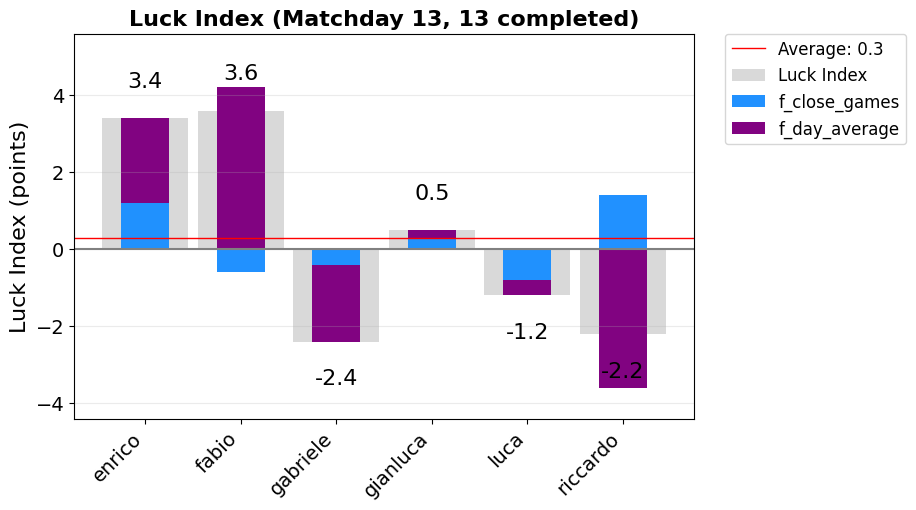

In [10]:
fanta.luck_index_plot(df_total, games, games_completed)

# Evolution Plots

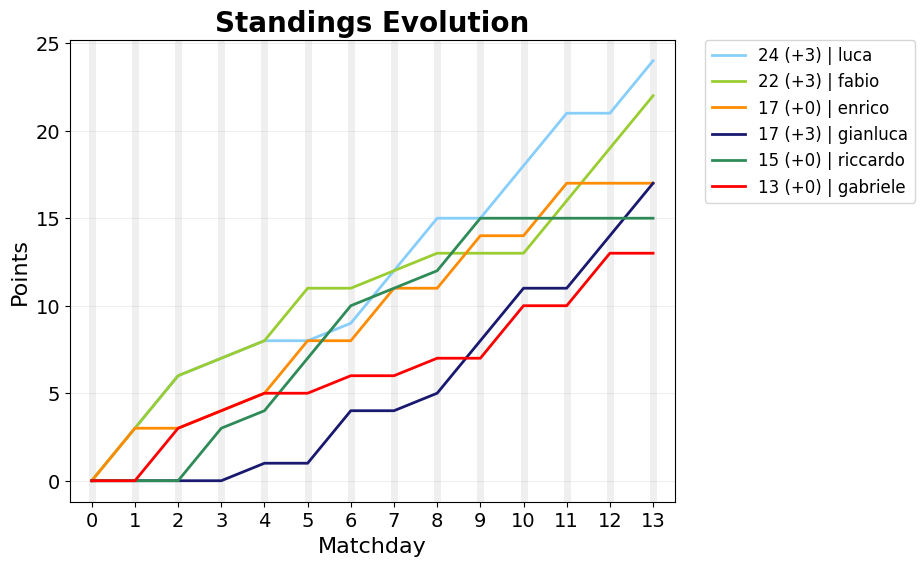

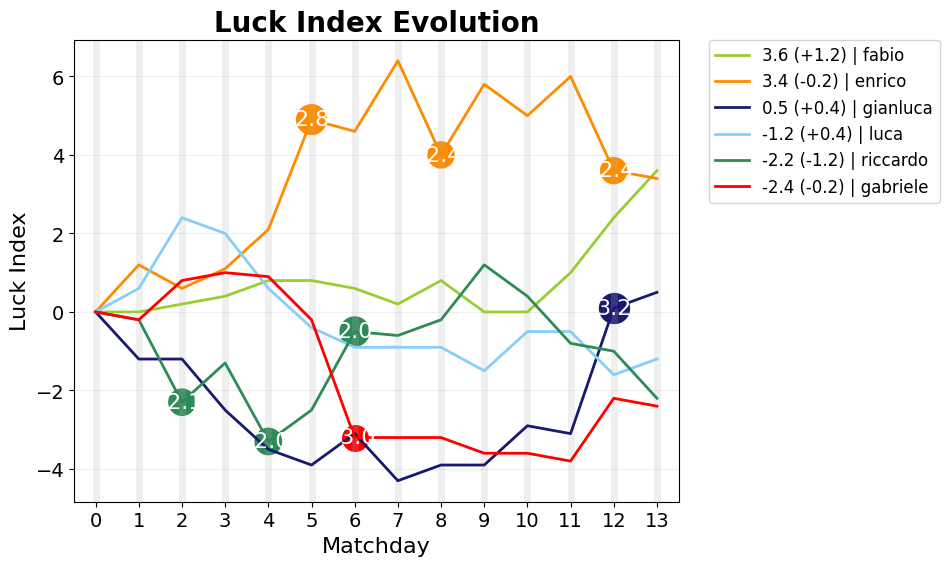

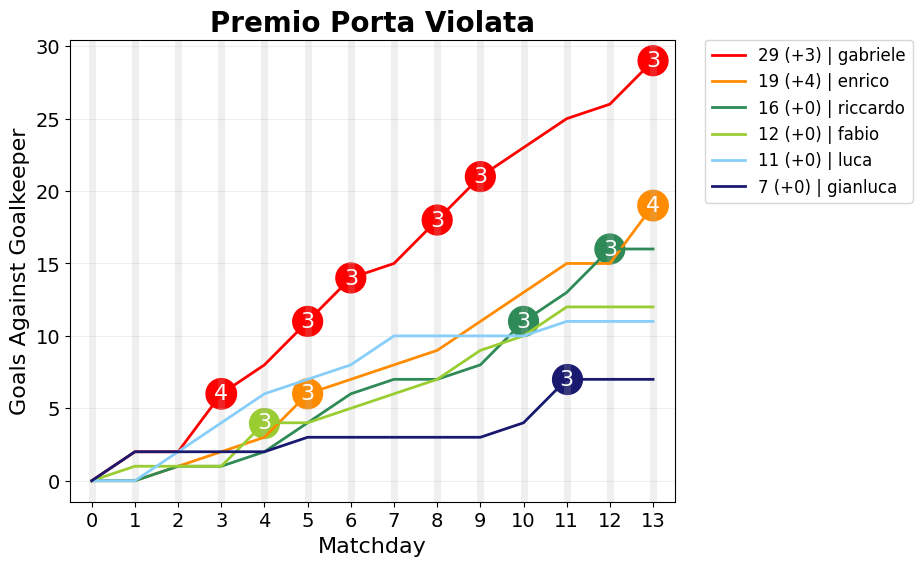

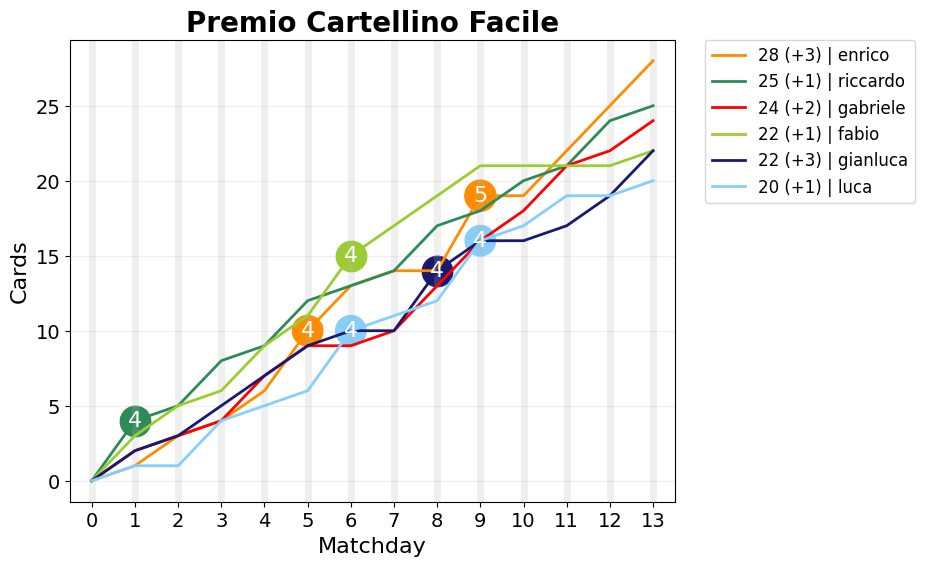

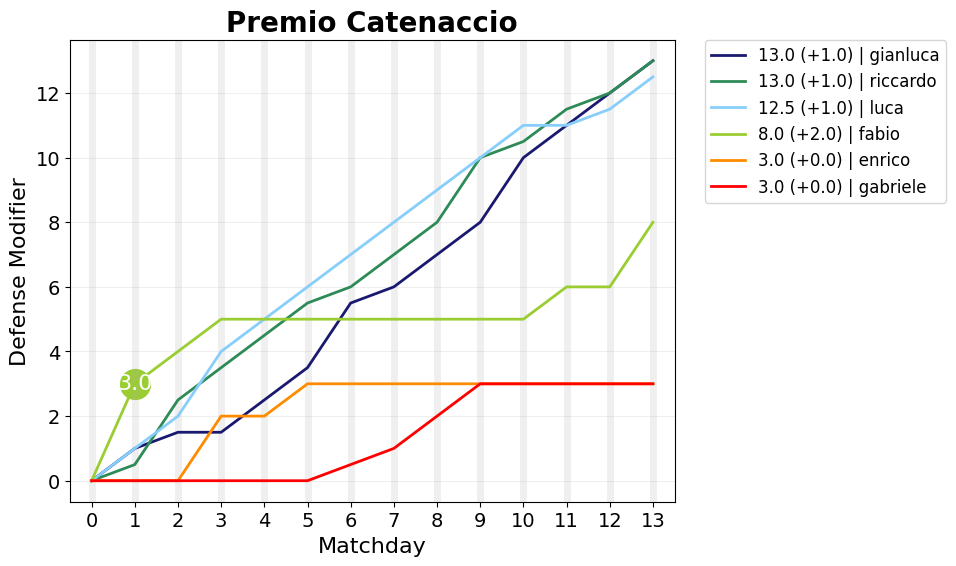

In [11]:
fanta.evo_plot(games, df_final, par='points', title='Standings Evolution', ylabel='Points', threshold=4)
fanta.evo_plot(games, df_final, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)
fanta.evo_plot(games, df_final,
               par='goals against gk', title='Premio Porta Violata', ylabel='Goals Against Goalkeeper', threshold=2)
fanta.evo_plot(games, df_final,
               par='cards', title='Premio Cartellino Facile', ylabel='Cards', threshold=3)
fanta.evo_plot(games, df_final,
               par='defense modifier', title='Premio Catenaccio', ylabel='Defense Modifier', threshold=2) 

# Box plots

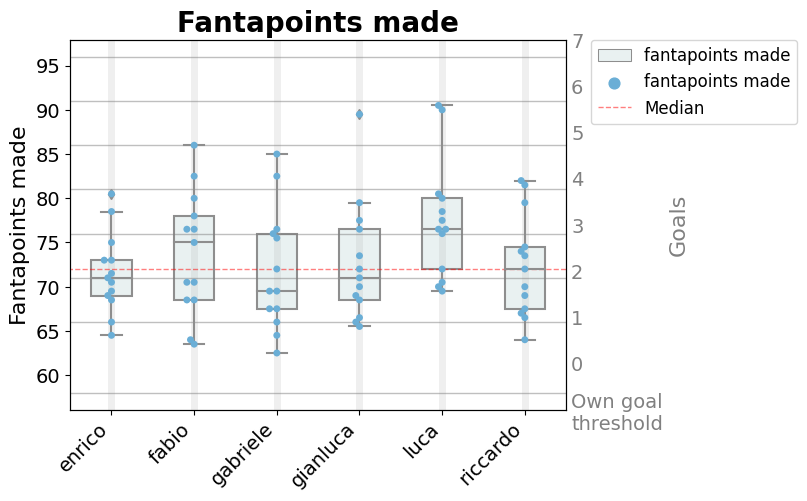

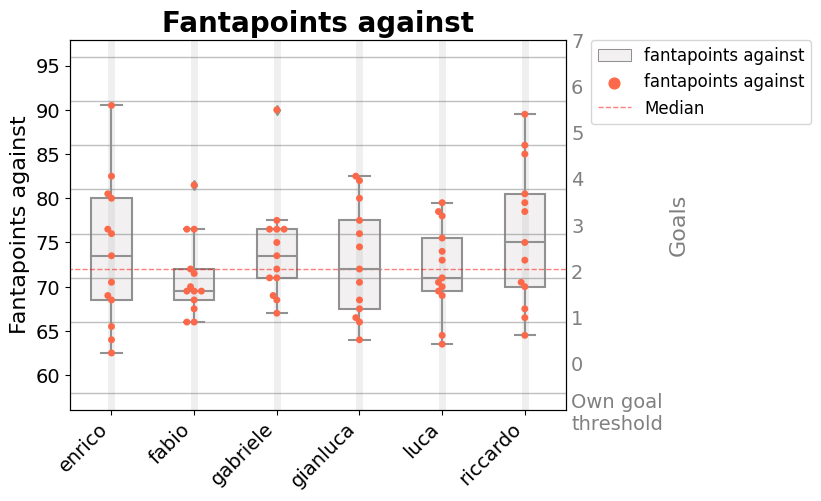

In [12]:
fanta.box_plot(df_final, fp_med,
               par='fantapoints made', label= 'Fantapoints made', title='Fantapoints made', col='cyan', pal='Blues')
fanta.box_plot(df_final, fp_med,
               par='fantapoints against', label= 'Fantapoints against', title='Fantapoints against', col='r', pal='Reds')

# Grahical display of results

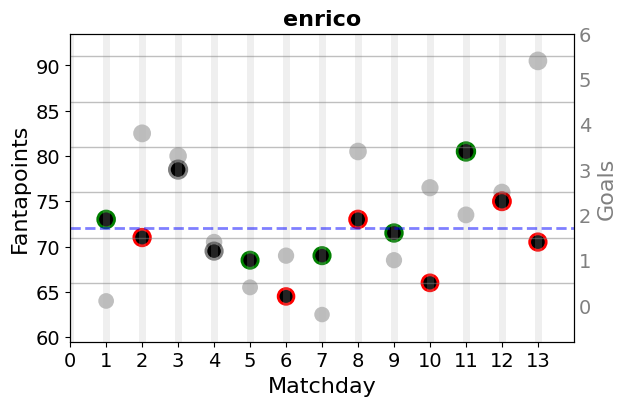

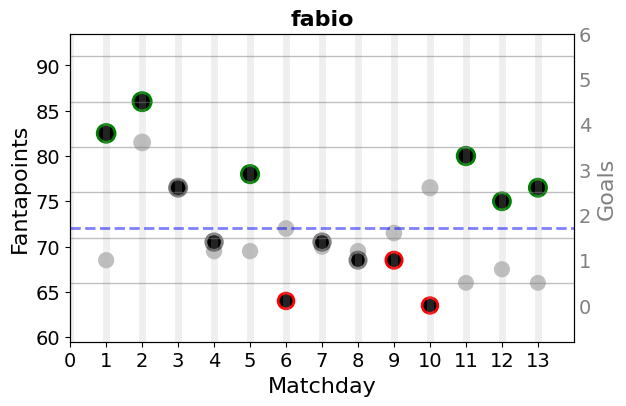

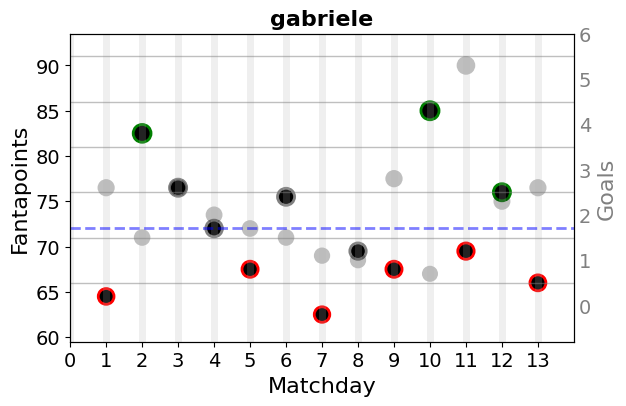

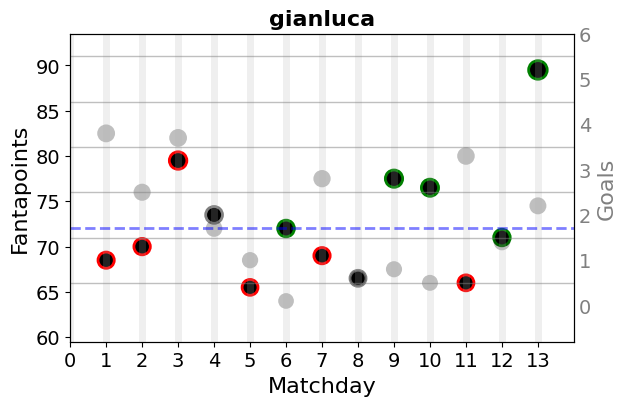

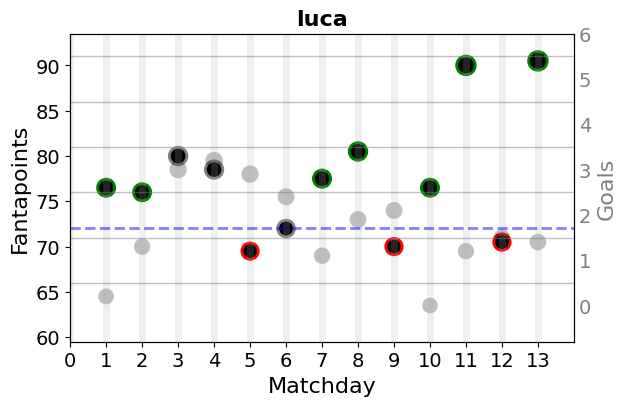

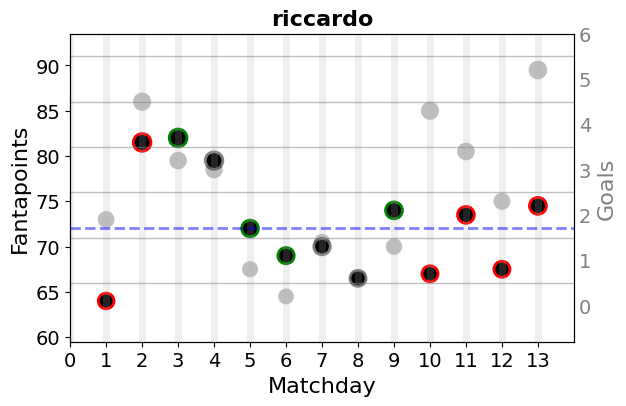

In [13]:
fanta.graphical_results(df_final, games, fp_med)

# Points and Goals vs Expected values

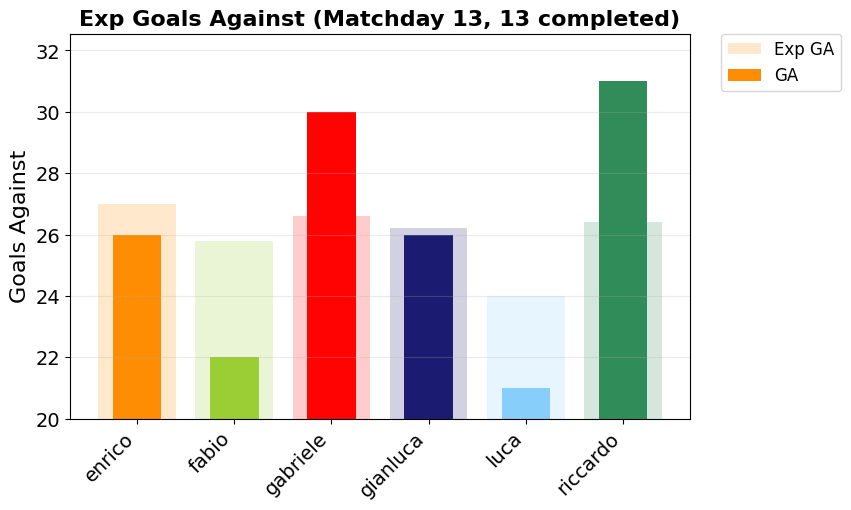

In [14]:
### Expected value of goals against, facing all other opponents ##############################
fanta.exp_goal_plot(df_total, games, games_completed)

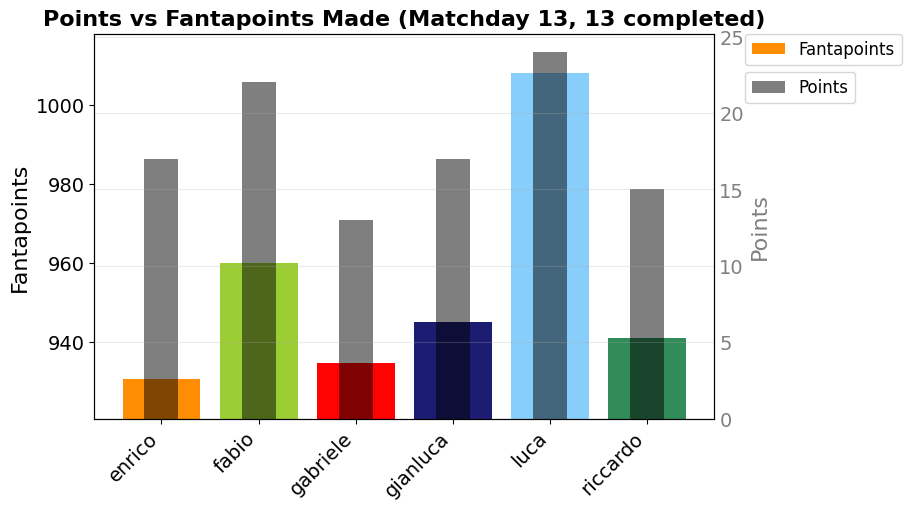

In [15]:
### Fantapoints made vs classification ###############
fanta.fantap_vs_class(df_total, games, games_completed)

# Stats & more

In [16]:
print('### CUMULATIVE DATA after matchday', games, '(', games_completed,' completed )  ###')
print('Fantapoints made:\n average =', fp_mean, '\n median =', fp_med, '\n standard deviation =', fp_std, 
      '\nGoals made:\n average =', gm_mean, '\n median =', gm_med, '\n standard deviation =', gm_std
     )

### Personal stats #####################################
personal_average = {}
for team, new_df in df_final.groupby(['team']):
    personal_average[team] = np.mean(new_df['fantapoints made'])
print('\n Personal Averages (Fantapoints):')
display(personal_average)

### CUMULATIVE DATA after matchday 13 ( 13  completed )  ###
Fantapoints made:
 average = 73.32051282051282 
 median = 72.0 
 standard deviation = 6.407614840339837 
Goals made:
 average = 2.0 
 median = 2.0 
 standard deviation = 1.2909944487358056

 Personal Averages (Fantapoints):


{'enrico': 71.57692307692308,
 'fabio': 73.84615384615384,
 'gabriele': 71.88461538461539,
 'gianluca': 72.6923076923077,
 'luca': 77.53846153846153,
 'riccardo': 72.38461538461539}

In [17]:
### Display data divided by player

print('### PERSONAL DATA ###\n')

gms = np.arange(1, games+1)

for team, new_df in df_final.groupby(['team']):
    print('Team:', config.Teams[team][0], '(',team,')')
    display(new_df.drop(['team'], axis=1).reindex(gms, fill_value='--'))
    print('\n\n')

### PERSONAL DATA ###

Team: Gianlucanonpressare ( enrico )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,73.0,64.0,0,1,0.0,2,0,W,3,0.0,1.2,1.2
2,71.0,82.5,1,2,0.0,2,4,L,0,0.0,-0.6,-0.6
3,78.5,80.0,1,1,2.0,3,3,T,1,0.3,0.2,0.5
4,69.5,70.5,1,2,0.0,1,1,T,1,0.2,0.8,1.0
5,68.5,65.5,3,4,1.0,1,0,W,3,0.8,2.0,2.8
6,64.5,69.0,1,3,0.0,0,1,L,0,-0.1,-0.2,-0.3
7,69.0,62.5,1,1,0.0,1,0,W,3,0.0,1.8,1.8
8,73.0,80.5,1,0,0.0,2,3,L,0,0.0,-2.4,-2.4
9,71.5,68.5,2,5,0.0,2,1,W,3,0.8,1.0,1.8





Team: Porti Chiusi Italiani ( fabio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,82.5,68.5,1,3,3.0,4,1,W,3,0.0,0.0,0.0
2,86.0,81.5,0,2,1.0,5,4,W,3,0.2,0.0,0.2
3,76.5,76.5,0,1,1.0,3,3,T,1,0.0,0.2,0.2
4,70.5,69.5,3,3,0.0,1,1,T,1,-0.4,0.8,0.4
5,78.0,69.5,0,2,0.0,3,1,W,3,0.0,0.0,0.0
6,64.0,72.0,1,4,0.0,0,2,L,0,0.0,-0.2,-0.2
7,70.5,70.0,1,2,0.0,1,1,T,1,-0.2,-0.2,-0.4
8,68.5,69.5,1,2,0.0,1,1,T,1,0.2,0.4,0.6
9,68.5,71.5,2,2,0.0,1,2,L,0,-0.4,-0.4,-0.8





Team: Sciagura ( gabriele )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.5,76.5,2,2,0.0,0,3,L,0,0.0,-0.2,-0.2
2,82.5,71.0,0,1,0.0,4,2,W,3,0.0,1.0,1.0
3,76.5,76.5,4,1,0.0,3,3,T,1,0.0,0.2,0.2
4,72.0,73.5,2,3,0.0,2,2,T,1,0.3,-0.4,-0.1
5,67.5,72.0,3,2,0.0,1,2,L,0,-0.1,-1.0,-1.1
6,75.5,71.0,3,0,0.5,2,2,T,1,-1.8,-1.2,-3.0
7,62.5,69.0,1,1,0.5,0,1,L,0,0.0,0.0,0.0
8,69.5,68.5,3,3,1.0,1,1,T,1,-0.4,0.4,0.0
9,67.5,77.5,3,3,1.0,1,3,L,0,0.0,-0.4,-0.4





Team: La mamma di Enrico ( gianluca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,68.5,82.5,2,2,1.0,1,4,L,0,0.0,-1.2,-1.2
2,70.0,76.0,0,1,0.5,1,3,L,0,0.0,0.0,0.0
3,79.5,82.0,0,2,0.0,3,4,L,0,-0.5,-0.8,-1.3
4,73.5,72.0,0,2,1.0,2,2,T,1,-0.6,-0.4,-1.0
5,65.5,68.5,1,2,1.0,0,1,L,0,-0.4,0.0,-0.4
6,72.0,64.0,0,1,2.0,2,0,W,3,0.0,0.8,0.8
7,69.0,77.5,0,0,0.5,1,3,L,0,0.0,-1.2,-1.2
8,66.5,66.5,0,4,1.0,1,1,T,1,0.0,0.4,0.4
9,77.5,67.5,0,2,1.0,3,1,W,3,0.0,0.0,0.0





Team: Nottingham Forrest Gump ( luca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,76.5,64.5,0,1,1.0,3,0,W,3,0.0,0.6,0.6
2,76.0,70.0,2,0,1.0,3,1,W,3,0.0,1.8,1.8
3,80.0,78.5,2,3,2.0,3,3,T,1,-0.6,0.2,-0.4
4,78.5,79.5,2,1,1.0,3,3,T,1,0.2,-1.6,-1.4
5,69.5,78.0,1,1,1.0,1,3,L,0,0.0,-1.0,-1.0
6,72.0,75.5,1,4,1.0,2,2,T,1,0.7,-1.2,-0.5
7,77.5,69.0,2,1,1.0,3,1,W,3,0.0,0.0,0.0
8,80.5,73.0,0,1,1.0,3,2,W,3,0.0,0.0,0.0
9,70.0,74.0,0,4,1.0,1,2,L,0,-0.2,-0.4,-0.6





Team: Laggente ( riccardo )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.0,73.0,0,4,0.5,0,2,L,0,0.0,-0.2,-0.2
2,81.5,86.0,1,1,2.0,4,5,L,0,-0.1,-2.0,-2.1
3,82.0,79.5,0,3,1.0,4,3,W,3,1.0,0.0,1.0
4,79.5,78.5,1,1,1.0,3,3,T,1,-0.4,-1.6,-2.0
5,72.0,67.5,2,3,1.0,2,1,W,3,0.2,0.6,0.8
6,69.0,64.5,2,1,0.5,1,0,W,3,0.2,1.8,2.0
7,70.0,70.5,1,1,1.0,1,1,T,1,0.1,-0.2,-0.1
8,66.5,66.5,0,3,1.0,1,1,T,1,0.0,0.4,0.4
9,74.0,70.0,1,1,2.0,2,1,W,3,0.4,1.0,1.4
